In [1]:
import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns      

import warnings
warnings.filterwarnings('ignore')

import matplotlib.font_manager as fm
import platform


plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 기호 깨짐 방지

In [2]:
df = pd.read_csv('./data/formodel1.csv')
print(df.shape)
display(df.head(10))
display(df.info())
display(df.describe())
print(df['killer_cluster'].value_counts().sort_index())

(614089, 13)


,player_name,avg_player_assists,avg_player_dbno,avg_player_dist_ride,avg_player_dist_walk,avg_player_dmg,avg_player_kills,avg_player_survive_time,avg_team_placement,victim_time,victim_position_x,victim_position_y,killer_cluster
0,0--kxxk--0,0.203125,0.328125,1233.789907,1113.421918,67.906250,0.359375,823.015641,18.562500,172,198047.9,291476.7,5
1,0--kxxk--0,0.203125,0.328125,1233.789907,1113.421918,67.906250,0.359375,823.015641,18.562500,231,346836.5,312080.0,27
2,0--kxxk--0,0.203125,0.328125,1233.789907,1113.421918,67.906250,0.359375,823.015641,18.562500,98,432471.4,635862.7,-1
3,0-0-Bram,0.267241,0.594828,1357.781589,1808.272817,120.577586,0.646552,964.484716,18.370690,146,393143.1,348960.9,34
4,0-0PenGzF,0.205882,0.764706,1049.706310,1268.093113,196.676471,1.617647,707.203706,30.882353,138,421411.3,325029.4,7
5,0-0Tiger,0.288136,0.525424,1291.003200,1008.792760,89.983051,0.474576,663.555593,27.372881,147,623460.4,379368.3,9
6,0-0_00_000_0_-0,0.455696,0.784810,1203.897231,1148.460107,162.341772,1.367089,809.440253,20.810127,151,547607.7,236398.3,17
7,0-0_00_000_0_-0,0.455696,0.784810,1203.897231,1148.460107,162.341772,1.367089,809.440253,20.810127,374,156776.8,289461.9,31
8,0-0_00_000_0_-0,0.455696,0.784810,1203.897231,1148.460107,162.341772,1.367089,809.440253,20.810127,354,440598.1,637305.3,23
9,0-0_00_000_0_-0,0.455696,0.784810,1203.897231,1148.460107,162.341772,1.367089,809.440253,20.810127,103,431026.3,634949.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614089 entries, 0 to 614088
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   player_name              614089 non-null  object 
 1   avg_player_assists       614089 non-null  float64
 2   avg_player_dbno          614089 non-null  float64
 3   avg_player_dist_ride     614089 non-null  float64
 4   avg_player_dist_walk     614089 non-null  float64
 5   avg_player_dmg           614089 non-null  float64
 6   avg_player_kills         614089 non-null  float64
 7   avg_player_survive_time  614089 non-null  float64
 8   avg_team_placement       614089 non-null  float64
 9   victim_time              614089 non-null  int64  
 10  victim_position_x        614089 non-null  float64
 11  victim_position_y        614089 non-null  float64
 12  killer_cluster           614089 non-null  int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 60.9+ MB


None

,avg_player_assists,avg_player_dbno,avg_player_dist_ride,avg_player_dist_walk,avg_player_dmg,avg_player_kills,avg_player_survive_time,avg_team_placement,victim_time,victim_position_x,victim_position_y,killer_cluster
count,614089.000000,614089.000000,614089.000000,614089.000000,614089.000000,614089.000000,614089.000000,614089.000000,614089.000000,614089.000000,614089.000000,614089.000000
mean,0.248571,0.676782,1047.943968,1079.262577,146.934182,1.095813,702.927589,28.125332,211.918312,428357.537080,409326.483902,14.105993
std,0.133709,0.411998,480.997863,270.739690,61.467127,0.528424,143.973430,9.984175,82.839740,135567.811699,157721.574206,10.114759
min,0.000000,0.000000,0.000000,21.871220,0.510158,0.000000,172.913986,2.786164,63.000000,0.000000,0.000000,-1.000000
25%,0.153846,0.395349,714.696433,893.721854,104.521739,0.732394,603.222073,20.841270,146.000000,374352.800000,324012.300000,7.000000
50%,0.227273,0.615385,975.158522,1063.485474,136.046154,1.000000,695.382035,26.050000,191.000000,423799.800000,374076.200000,13.000000
75%,0.318182,0.886076,1296.545306,1248.976322,177.176471,1.346667,793.725025,33.235294,266.000000,465081.600000,612008.400000,23.000000
max,2.216216,9.312500,6531.060708,3063.052341,1413.656250,12.656250,1634.326883,81.704545,420.000000,778747.700000,744105.600000,39.000000


killer_cluster
-1       2519
 0      36254
 2       8550
 3      22230
 4      19383
 5      33668
 6       5059
 7     131878
 8       5757
 9      34089
 10       435
 11      1280
 12      4598
 13     16234
 14      3062
 15     70785
 16      5326
 17      5774
 18     13563
 19      5129
 20      5498
 21     20079
 22      6979
 23     47073
 24      6246
 25     11928
 26      1292
 27     14612
 28      5116
 29     12907
 30      2955
 31     10937
 32      4795
 33      7716
 34      7033
 35      2293
 36       592
 37      8034
 38      5543
 39      6888
Name: count, dtype: int64


In [3]:
# 오류값 변경
df.loc[df['killer_cluster'] == -1, 'killer_cluster'] = 1
print(df['killer_cluster'].value_counts().sort_index())

killer_cluster
0      36254
1       2519
2       8550
3      22230
4      19383
5      33668
6       5059
7     131878
8       5757
9      34089
10       435
11      1280
12      4598
13     16234
14      3062
15     70785
16      5326
17      5774
18     13563
19      5129
20      5498
21     20079
22      6979
23     47073
24      6246
25     11928
26      1292
27     14612
28      5116
29     12907
30      2955
31     10937
32      4795
33      7716
34      7033
35      2293
36       592
37      8034
38      5543
39      6888
Name: count, dtype: int64


| 영문 컬럼명                    | 한글 번역           |
| ------------------------- | --------------- |
| `player_name`             | 플레이어 이름         |
| `avg_player_assists`      | 평균 어시스트 수       |
| `avg_player_dbno`         | 평균 다운(기절)시킨 수   |
| `avg_player_dist_ride`    | 평균 이동 거리(탑승 이동) |
| `avg_player_dist_walk`    | 평균 이동 거리(도보 이동) |
| `avg_player_dmg`          | 평균 피해량          |
| `avg_player_kills`        | 평균 킬 수          |
| `avg_player_survive_time` | 평균 생존 시간        |
| `avg_team_placement`      | 평균 팀 순위         |
| `victim_time`             | 희생(사망) 시점 시간    |
| `victim_position_x`       | 희생 위치 X좌표       |
| `victim_position_y`       | 희생 위치 Y좌표       |
| `killer_cluster`          | 킬러(가해자) 군집 번호   |


In [4]:
# 컬럼명 한글화
rename_dict = {
    'player_name': '플레이어이름',
    'avg_player_assists': '평균어시스트수',
    'avg_player_dbno': '평균다운시킨수',
    'avg_player_dist_ride': '평균이동거리_탑승',
    'avg_player_dist_walk': '평균이동거리_도보',
    'avg_player_dmg': '평균피해량',
    'avg_player_kills': '평균킬수',
    'avg_player_survive_time': '평균생존시간',
    'avg_team_placement': '평균팀순위',
    'victim_time': '사망시점시간',
    'victim_position_x': '사망위치_X',
    'victim_position_y': '사망위치_Y',
    'killer_cluster': '킬러군집번호'
}

# 컬럼명 변경
df = df.rename(columns=rename_dict)

# 결과 확인
display(df.head())

,플레이어이름,평균어시스트수,평균다운시킨수,평균이동거리_탑승,평균이동거리_도보,평균피해량,평균킬수,평균생존시간,평균팀순위,사망시점시간,사망위치_X,사망위치_Y,킬러군집번호
0,0--kxxk--0,0.203125,0.328125,1233.789907,1113.421918,67.906250,0.359375,823.015641,18.562500,172,198047.9,291476.7,5
1,0--kxxk--0,0.203125,0.328125,1233.789907,1113.421918,67.906250,0.359375,823.015641,18.562500,231,346836.5,312080.0,27
2,0--kxxk--0,0.203125,0.328125,1233.789907,1113.421918,67.906250,0.359375,823.015641,18.562500,98,432471.4,635862.7,1
3,0-0-Bram,0.267241,0.594828,1357.781589,1808.272817,120.577586,0.646552,964.484716,18.370690,146,393143.1,348960.9,34
4,0-0PenGzF,0.205882,0.764706,1049.706310,1268.093113,196.676471,1.617647,707.203706,30.882353,138,421411.3,325029.4,7


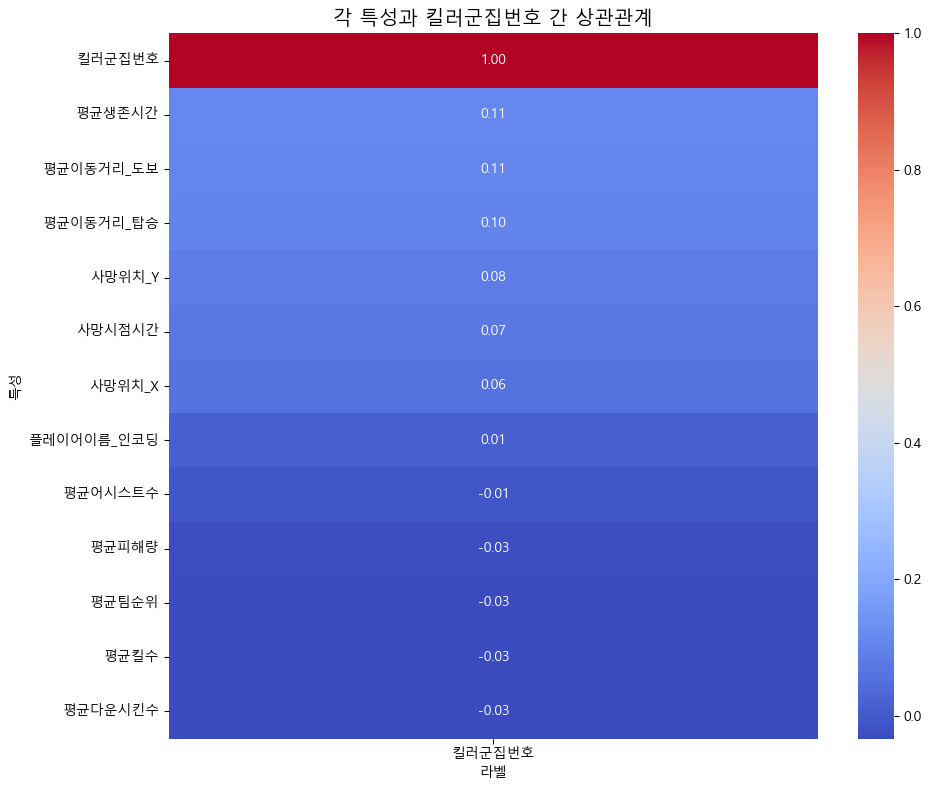

In [5]:
# 전처리
from sklearn.preprocessing import LabelEncoder

# 플레이어이름 라벨 인코딩
le = LabelEncoder()
df['플레이어이름_인코딩'] = le.fit_transform(df['플레이어이름'])

# 분석에 사용할 컬럼 지정
feature_cols = [
    '플레이어이름_인코딩', '평균어시스트수', '평균다운시킨수',
    '평균이동거리_탑승', '평균이동거리_도보', '평균피해량',
    '평균킬수', '평균생존시간', '평균팀순위',
    '사망시점시간', '사망위치_X', '사망위치_Y'
]
label_col = '킬러군집번호'
# 상관계수 계산용 데이터프레임
corr_df = df[feature_cols + [label_col]]

# 상관계수 계산
corr_matrix = corr_df.corr(numeric_only=True)

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix[[label_col]].sort_values(by=label_col, ascending=False),
    annot=True, cmap='coolwarm', fmt='.2f', cbar=True
)
plt.title('각 특성과 킬러군집번호 간 상관관계', fontsize=14)
plt.xlabel('라벨')
plt.ylabel('특성')
plt.tight_layout()
plt.show() 

  File "c:\Users\Playdata\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Playdata\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\Lib

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3059
[LightGBM] [Info] Number of data points in the train set: 491271, number of used features: 12
[LightGBM] [Info] Start training from score -2.829597
[LightGBM] [Info] Start training from score -5.496377
[LightGBM] [Info] Start training from score -4.274208
[LightGBM] [Info] Start training from score -3.318697
[LightGBM] [Info] Start training from score -3.455769
[LightGBM] [Info] Start training from score -2.903606
[LightGBM] [Info] Start training from score -4.799020
[LightGBM] [Info] Start training from score -1.538266
[LightGBM] [Info] Start training from score -4.669636
[LightGBM] [Info] Start training from score -2.891172
[LightGBM] [Info] Start training from score -7.252549
[LightGBM] [Info] Start training from score -6.173279
[LightGBM] [Info] Start training from score -4.894355
[LightGB

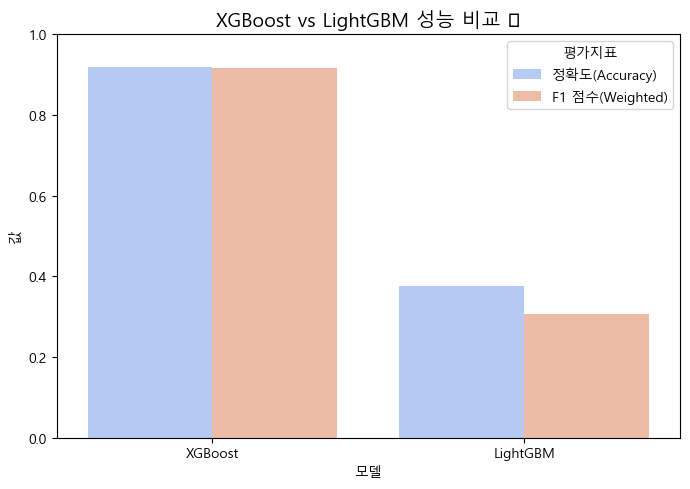


[ XGBoost 분류 리포트 ]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7251
           1       0.00      0.00      0.00       504
           2       0.93      0.95      0.94      1710
           3       0.86      0.84      0.85      4446
           4       0.95      0.96      0.96      3877
           5       0.97      0.98      0.97      6734
           6       0.89      0.73      0.81      1012
           7       0.97      0.99      0.98     26376
           8       0.96      0.98      0.97      1151
           9       0.98      0.98      0.98      6818
          10       0.92      0.91      0.91        87
          11       0.91      0.90      0.90       256
          12       0.92      0.97      0.94       919
          13       0.92      0.96      0.94      3247
          14       0.89      0.86      0.87       612
          15       0.83      0.90      0.86     14157
          16       0.81      0.69      0.74      1065
       

In [6]:
# 1st 모델링
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 데이터 분리
X = df[[
    '플레이어이름_인코딩', '평균어시스트수', '평균다운시킨수',
    '평균이동거리_탑승', '평균이동거리_도보', '평균피해량',
    '평균킬수', '평균생존시간', '평균팀순위',
    '사망시점시간', '사망위치_X', '사망위치_Y'
]]
y = df['킬러군집번호']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# XGBoost 모델 학습
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

# 예측
xgb_pred = xgb_model.predict(X_test)

# 평가
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# LightGBM 모델 학습
lgb_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# 예측
lgb_pred = lgb_model.predict(X_test)

# 평가
lgb_acc = accuracy_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred, average='weighted')


# 결과 비교
results = pd.DataFrame({
    '모델': ['XGBoost', 'LightGBM'],
    '정확도(Accuracy)': [xgb_acc, lgb_acc],
    'F1 점수(Weighted)': [xgb_f1, lgb_f1]
})

print("모델 성능 비교 결과")
print(results)

# 시각화
plt.figure(figsize=(7, 5))
sns.barplot(data=results.melt(id_vars='모델', var_name='지표', value_name='값'),
            x='모델', y='값', hue='지표', palette='coolwarm')
plt.title('XGBoost vs LightGBM 성능 비교', fontsize=14)
plt.ylim(0, 1)
plt.legend(title='평가지표')
plt.tight_layout()
plt.show()

# 상세 리포트
print("\n[ XGBoost 분류 리포트 ]")
print(classification_report(y_test, xgb_pred))
print("\n[ LightGBM 분류 리포트 ]")
print(classification_report(y_test, lgb_pred))

In [8]:
# 데이터 크기 확인
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape if hasattr(y_train, 'shape') else len(y_train))
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape if hasattr(y_test, 'shape') else len(y_test))

if 'X_train_scaled' in dir():
    print("X_train_scaled shape:", X_train_scaled.shape)
if 'X_test_scaled' in dir():
    print("X_test_scaled shape:", X_test_scaled.shape)

X_train shape: (491271, 12)
y_train shape: (491271,)
X_test shape: (122818, 12)
y_test shape: (122818,)


In [9]:
# 데이터 크기 재조정
# 데이터 재준비 (처음부터)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. 인덱스 리셋
feature_cols = [
    '플레이어이름_인코딩', '평균어시스트수', '평균다운시킨수',
    '평균이동거리_탑승', '평균이동거리_도보', '평균피해량',
    '평균킬수', '평균생존시간', '평균팀순위',
    '사망시점시간', '사망위치_X', '사망위치_Y'
]
X = df[feature_cols].copy().reset_index(drop=True)
y = df['킬러군집번호'].copy().reset_index(drop=True)

print(f"초기: X={X.shape}, y={len(y)}")  # 같은 길이여야 함

# 2. 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"분할 후: X_train={X_train.shape}, y_train={len(y_train)}")

# 4. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"최종: X_train_scaled={X_train_scaled.shape}, y_train={len(y_train)}")

초기: X=(614089, 12), y=614089
분할 후: X_train=(491271, 12), y_train=491271
최종: X_train_scaled=(491271, 12), y_train=491271


기본 모델 F1-Score: 0.9163

Optuna 최적화 시작


Optuna 탐색 진행:   0%|                                                      | 0/20 [00:00<?, ?it/s]


최적화 완료!
최적 파라미터: {'n_estimators': 109, 'max_depth': 8, 'learning_rate': 0.04027950521768716, 'colsample_bytree': 0.869308716305864, 'reg_alpha': 0.3671425546987771, 'reg_lambda': 7.770335461727582e-05}
최고 교차검증 F1-Score: 0.9166

테스트 세트 성능
Accuracy : 0.9202
Precision: 0.9155
Recall   : 0.9202
F1-Score : 0.9167


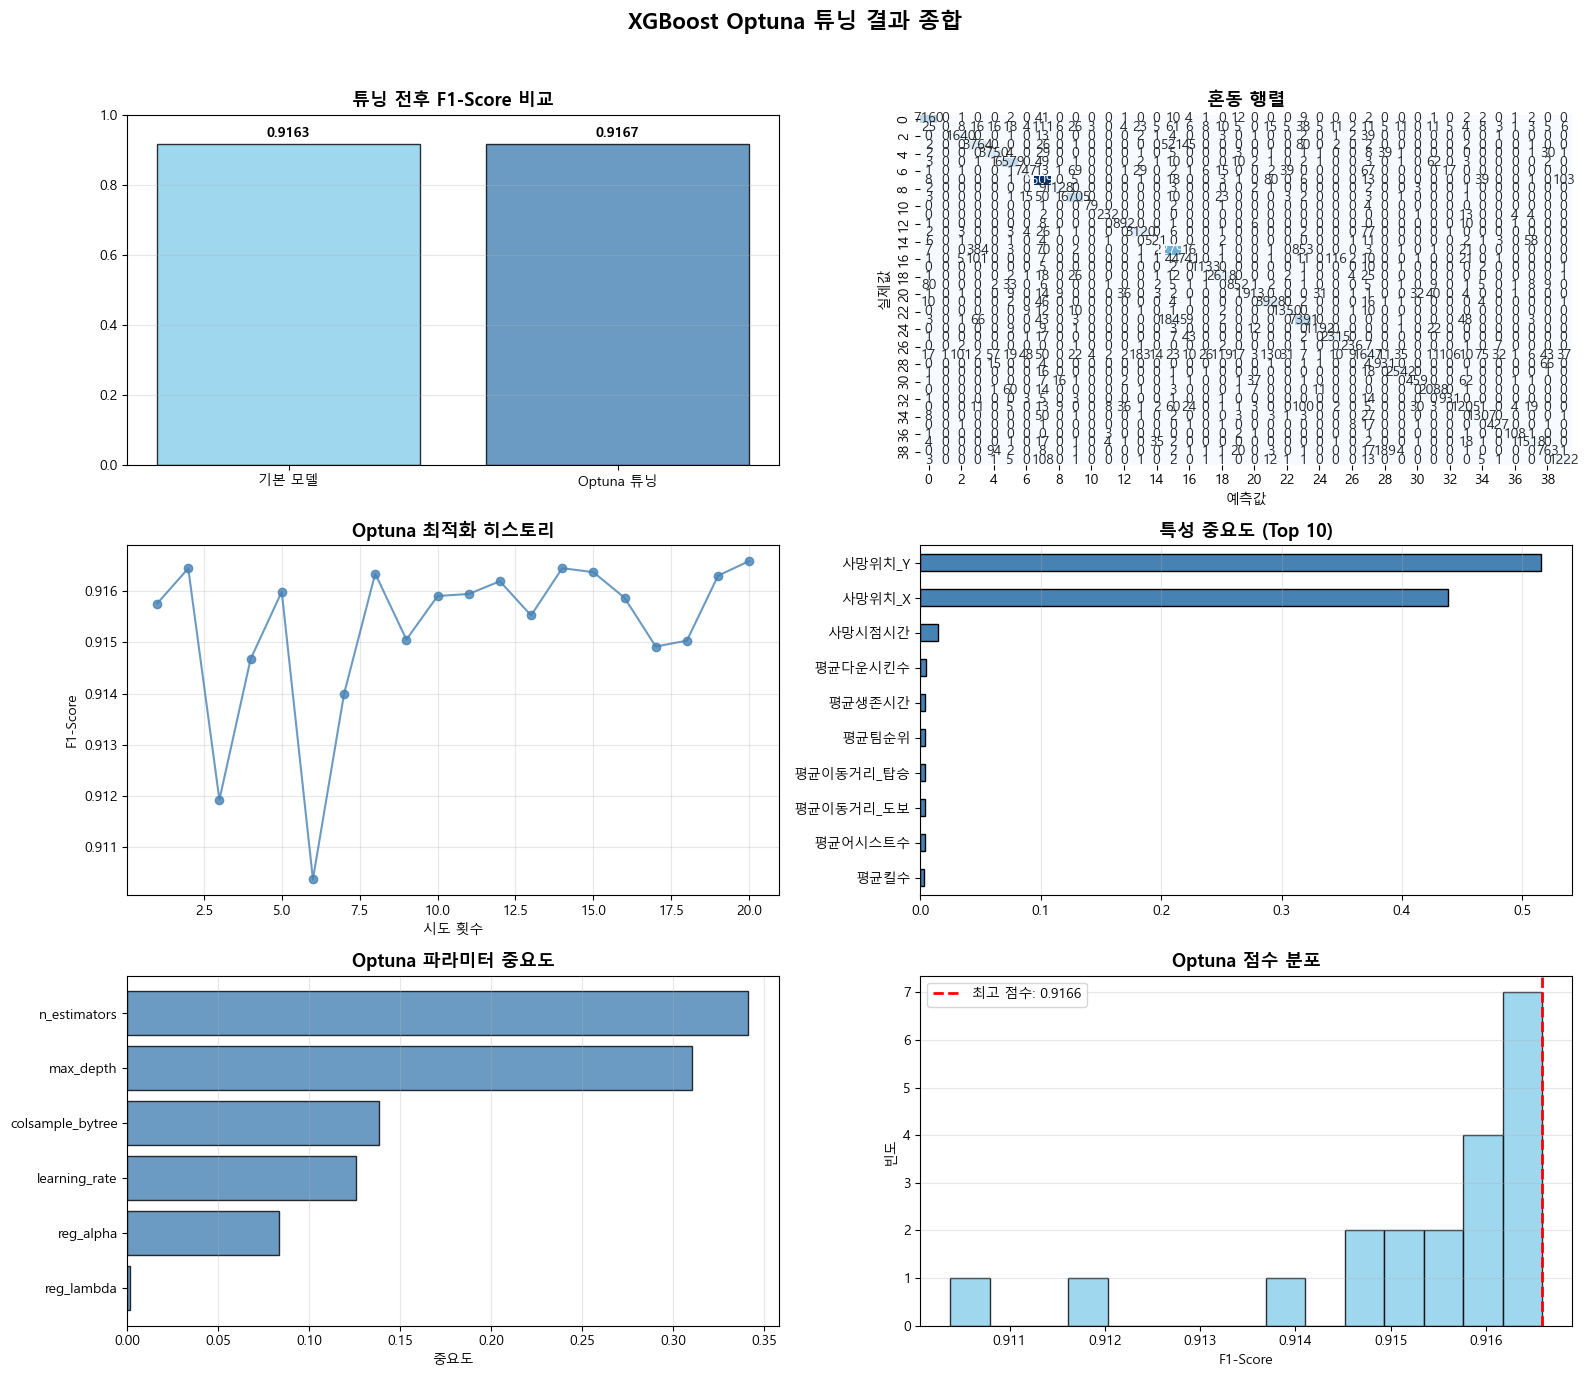


최종 요약
기본 모델 F1-Score:  0.9163
튜닝 모델 F1-Score:  0.9167
성능 향상률:          +0.04%
최적 파라미터: {'n_estimators': 109, 'max_depth': 8, 'learning_rate': 0.04027950521768716, 'colsample_bytree': 0.869308716305864, 'reg_alpha': 0.3671425546987771, 'reg_lambda': 7.770335461727582e-05}


In [11]:
# ============================================
# 라이브러리
# ============================================
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
optuna.logging.set_verbosity(optuna.logging.WARNING)

# ============================================
# 1. 기본 모델 (튜닝 전)
# ============================================
base_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='mlogloss',
    n_jobs=-1
)
base_model.fit(X_train_scaled, y_train)
y_pred_base = base_model.predict(X_test_scaled)

base_f1 = f1_score(y_test, y_pred_base, average='weighted')
print(f"기본 모델 F1-Score: {base_f1:.4f}")

# ============================================
# 2. Optuna Objective 함수
# ============================================
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'random_state': 42,
        'eval_metric': 'mlogloss',
        'n_jobs': -1
    }

    model = xgb.XGBClassifier(**params)
    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='f1_weighted').mean()
    return score

# ============================================
# 3. Optuna 최적화 실행
# ============================================
n_trials = 20
print("\nOptuna 최적화 시작")
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))

for _ in tqdm(range(n_trials), desc="Optuna 탐색 진행", ncols=100):
    study.optimize(objective, n_trials=1, show_progress_bar=False)

print("\n최적화 완료!")
print("최적 파라미터:", study.best_params)
print(f"최고 교차검증 F1-Score: {study.best_value:.4f}")

# ============================================
# 4. 최적 모델 학습 및 평가
# ============================================
best_model = xgb.XGBClassifier(**study.best_params, random_state=42, eval_metric='mlogloss')
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

test_acc = accuracy_score(y_test, y_pred_best)
test_f1 = f1_score(y_test, y_pred_best, average='weighted')
test_pre = precision_score(y_test, y_pred_best, average='weighted', zero_division=0)
test_rec = recall_score(y_test, y_pred_best, average='weighted', zero_division=0)

print("\n테스트 세트 성능")
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_pre:.4f}")
print(f"Recall   : {test_rec:.4f}")
print(f"F1-Score : {test_f1:.4f}")

# ============================================
# 5. 시각화
# ============================================
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
plt.suptitle('XGBoost Optuna 튜닝 결과 종합', fontsize=16, fontweight='bold')

# (1) 튜닝 전후 F1-Score 비교
axes[0, 0].bar(['기본 모델', 'Optuna 튜닝'], [base_f1, test_f1],
                color=['skyblue', 'steelblue'], edgecolor='black', alpha=0.8)
axes[0, 0].set_title('튜닝 전후 F1-Score 비교', fontsize=13, fontweight='bold')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate([base_f1, test_f1]):
    axes[0, 0].text(i, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# (2) 혼동 행렬
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d',
            cmap='Blues', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('혼동 행렬', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('예측값')
axes[0, 1].set_ylabel('실제값')

# (3) 최적화 히스토리
trials = [t.value for t in study.trials if t.value is not None]
axes[1, 0].plot(range(1, len(trials)+1), trials, marker='o', color='steelblue', alpha=0.8)
axes[1, 0].set_title('Optuna 최적화 히스토리', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('시도 횟수')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].grid(alpha=0.3)

# (4) 특성 중요도
feat_imp = pd.Series(best_model.feature_importances_, index=feature_cols).sort_values()
feat_imp.tail(10).plot(kind='barh', ax=axes[1, 1], color='steelblue', edgecolor='black')
axes[1, 1].set_title('특성 중요도 (Top 10)', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

# (5) 파라미터 중요도
param_importance = optuna.importance.get_param_importances(study)
param_df = pd.DataFrame({
    'Parameter': list(param_importance.keys()),
    'Importance': list(param_importance.values())
}).sort_values('Importance', ascending=True)

axes[2, 0].barh(param_df['Parameter'], param_df['Importance'],
                color='steelblue', edgecolor='black', alpha=0.8)
axes[2, 0].set_title('Optuna 파라미터 중요도', fontsize=13, fontweight='bold')
axes[2, 0].set_xlabel('중요도')
axes[2, 0].grid(axis='x', alpha=0.3)

# (6) 점수 분포
axes[2, 1].hist(trials, bins=15, color='skyblue', edgecolor='black', alpha=0.8)
axes[2, 1].axvline(study.best_value, color='red', linestyle='--', linewidth=2,
                   label=f'최고 점수: {study.best_value:.4f}')
axes[2, 1].set_title('Optuna 점수 분포', fontsize=13, fontweight='bold')
axes[2, 1].set_xlabel('F1-Score')
axes[2, 1].set_ylabel('빈도')
axes[2, 1].legend()
axes[2, 1].grid(axis='y', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ============================================
# 6. 요약
# ============================================
improve = ((test_f1 - base_f1) / base_f1) * 100
print("\n" + "="*60)
print("최종 요약")
print("="*60)
print(f"기본 모델 F1-Score:  {base_f1:.4f}")
print(f"튜닝 모델 F1-Score:  {test_f1:.4f}")
print(f"성능 향상률:          {improve:+.2f}%")
print(f"최적 파라미터: {study.best_params}")
print("="*60)

In [13]:
import joblib

# 모델 저장
joblib.dump(best_model, '1st_xgb_model.joblib')

# 모델 불러오기
loaded_model = joblib.load('1st_xgb_model.joblib')

# 예측 테스트
y_pred_loaded = loaded_model.predict(X_test_scaled)
print(f"불러온 모델 F1-Score: {f1_score(y_test, y_pred_loaded, average='weighted'):.4f}")

불러온 모델 F1-Score: 0.9167
